<a href="https://colab.research.google.com/github/Dulina77/CalorieExpendition/blob/main/Kagglecompetition_CalorieExpendition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [126]:
training_data = pd.read_csv('/content/train.csv')
testing_data = pd.read_csv('/content/test.csv')



In [127]:
training_data.isna().sum()


,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [128]:
training_data.dtypes

,0
id,int64
Sex,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64
Calories,float64


In [129]:
training_data

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...,...
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0


In [130]:
training_data.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [131]:
training_data['Sex'].value_counts()

,count
Sex,
female,375721
male,374279


In [132]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [133]:
encoder = OneHotEncoder()
training_data = pd.get_dummies(training_data)
testing_data = pd.get_dummies(testing_data)

In [134]:
training_data['Sex_female'] = training_data['Sex_female'].astype(int)
training_data['Sex_male'] = training_data['Sex_male'].astype(int)

In [135]:
testing_data['Sex_female'] = testing_data['Sex_female'].astype(int)
testing_data['Sex_male'] = testing_data['Sex_male'].astype(int)

In [136]:

X_train = training_data.drop(columns=['Calories','id'])
X_test = testing_data.drop(columns=['id'])
y_train = training_data['Calories']

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [138]:
lr_model = LinearRegression()

pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('lr_model', lr_model)
], verbose=True)

pipeline.fit(X_train,y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] .......... (step 2 of 2) Processing lr_model, total=   0.3s


Pipeline(steps=[('scaler', StandardScaler()), ('lr_model', LinearRegression())],
         verbose=True)

In [143]:
predictions = pipeline.predict(X_test)
predictions = np.maximum(predictions, 1)

In [144]:
submission = pd.DataFrame({
    'id' : testing_data['id'],
    'prediction' : predictions
})

In [145]:
submission.to_csv("Submissoin.csv",index = False)

In [146]:
submission.describe()


,id,prediction
count,250000.000000,250000.000000
mean,874999.500000,88.668081
std,72168.927986,60.761439
min,750000.000000,1.000000
25%,812499.750000,34.324036
50%,874999.500000,82.764553
75%,937499.250000,139.498135
max,999999.000000,247.336138


Analyzing Correlations

In [147]:
training_data.corr()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Sex_female,Sex_male
id,1.000000,0.002330,0.000101,0.000524,0.001647,0.001092,0.001612,0.001148,0.000065,-0.000065
Age,0.002330,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683,-0.009689,0.009689
Height,0.000101,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026,-0.755906,0.755906
Weight,0.000524,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863,-0.818250,0.818250
Duration,0.001647,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908,0.009594,-0.009594
Heart_Rate,0.001092,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748,-0.009122,0.009122
Body_Temp,0.001612,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671,0.015933,-0.015933
Calories,0.001148,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000,-0.012011,0.012011
Sex_female,0.000065,-0.009689,-0.755906,-0.818250,0.009594,-0.009122,0.015933,-0.012011,1.000000,-1.000000
Sex_male,-0.000065,0.009689,0.755906,0.818250,-0.009594,0.009122,-0.015933,0.012011,-1.000000,1.000000


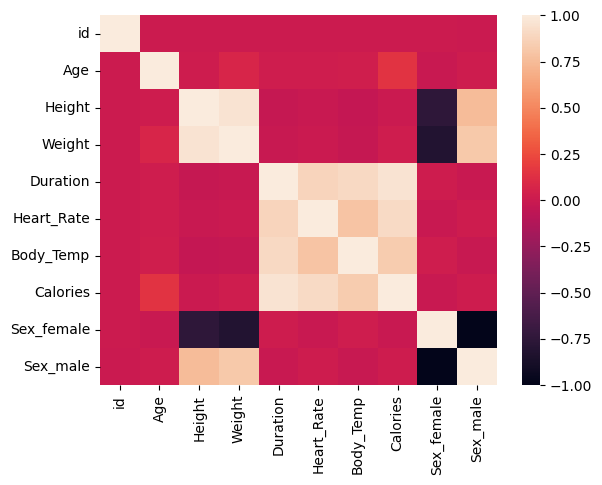

In [149]:
import seaborn as sns

figure = sns.heatmap(training_data.corr())